## Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import tensorflow as tf

# Add current directory to path to import our module
sys.path.append('.')
from meridian.analysis.response_curve_generator import ResponseCurveGenerator
from meridian.model import model

# Set up plotting
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

print("📦 Imports completed successfully!")

📦 Imports completed successfully!


📁 Loading model: /Users/mariappan.subramanian/Library/CloudStorage/OneDrive-TheTradeDesk/MMM/Media Parameter Analysis/Dev/MMMFeasibility/model_objects/0_test_working_spend_Allergan.pkl
📊 Scaled media data extracted:
   Shape: (36, 78, 3) (geos, times, channels)
   Channels: ['TV', 'Display', 'Video']
   Value range: [[0. 0. 0.], [5.314437  4.65273   5.4278736]]
📊 Median parameters extracted:
   Media channels: 3 params
   Alpha range: [0.213, 0.828]
   EC range: [2.617, 5.816]
   Max lag (adstock): 8
🎯 Generating response curves with actual business metrics...
   Aggregation level: national
   Multiplier range: 0 to 3.0x
   Curve resolution: 31 points

📊 Step 1: Generating scaled media scenarios...
🗺️ Generating geo-level scaled media scenarios...
   Max multiplier: 3.0x
   Steps per geo: 31
   Historical scaled media shape: (36, 78, 3)
   Geo max scaled media shape: (36, 3)
   Scaled media range: [1.115, 5.428]
✅ Geo scaled media scenarios generated:
   Output shape: (36, 31, 3) (geos

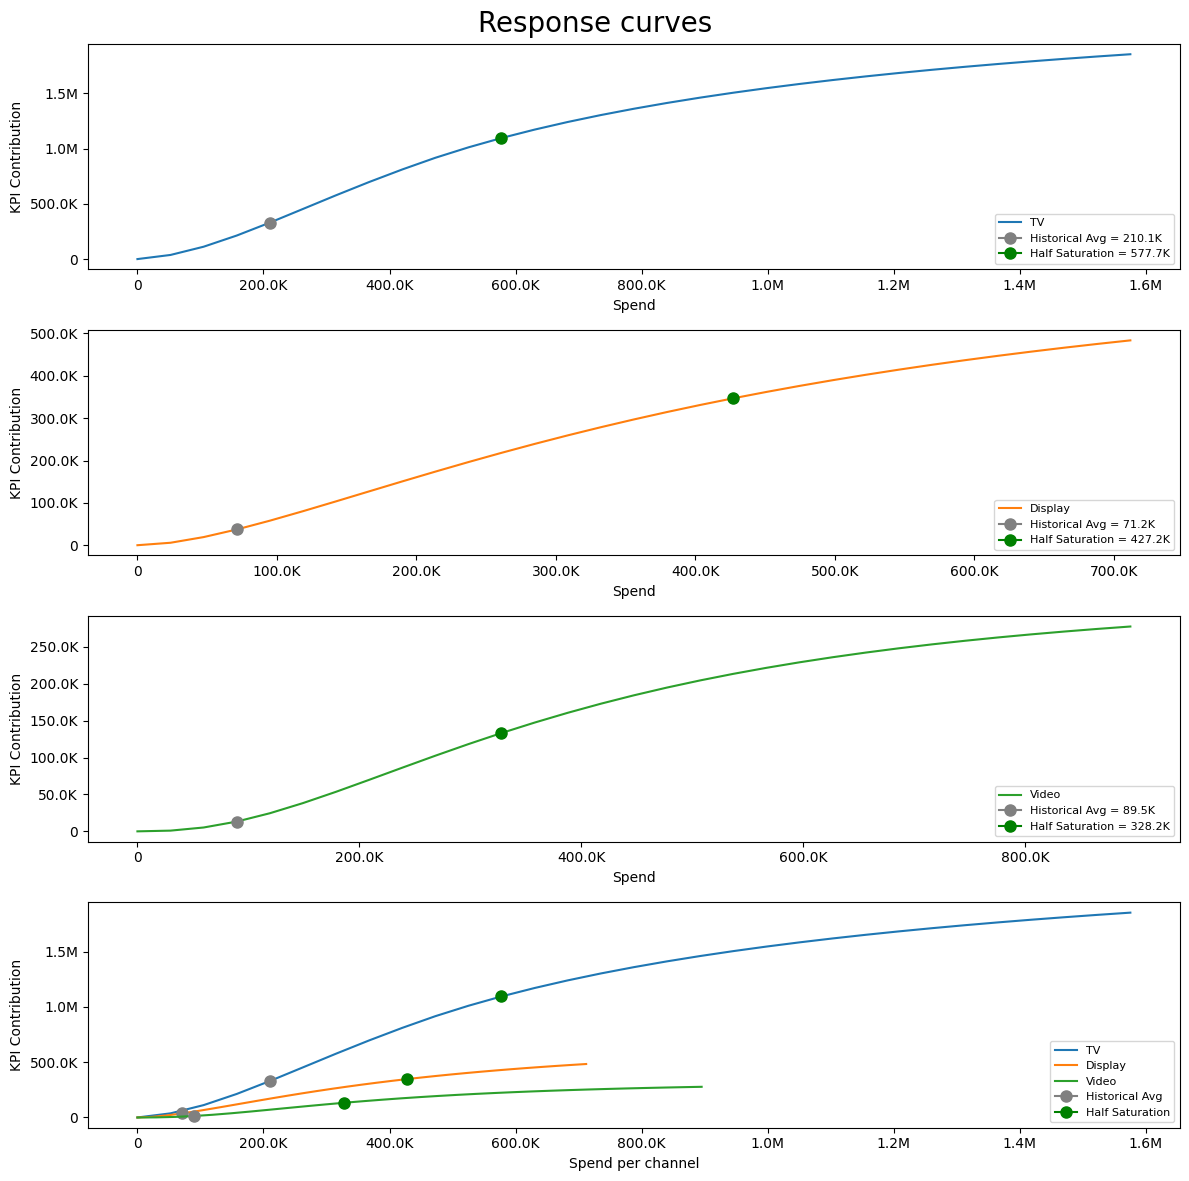


✅ MPA-style response curve visualizations created!
   📈 Individual channel plots with key saturation markers
   📈 Combined plot showing all channels together
   💡 Historical Avg (grey), Half Saturation (green)
   🔍 Using actual historical data for marker calculations


In [6]:
# Model path
client = "Allergan"   # "ALDI_US_Starcom"
model_path = f"/Users/mariappan.subramanian/Library/CloudStorage/OneDrive-TheTradeDesk/MMM/Media Parameter Analysis/Dev/MMMFeasibility/model_objects/0_test_working_spend_{client}.pkl"

print(f"📁 Loading model: {model_path}")
mmm = model.load_mmm(model_path)

# Initialize simulator
simulator = ResponseCurveGenerator(mmm)

# Generate response curves
response_curves, metadata = simulator.generate_response_curves(
  max_multiplier=3.0,
  num_steps=31,
  aggregation_level="national"
)

# Create MPA-style visualization
simulator.plot_response_curves(
  response_curves, metadata,
  figure_size=(12, 12),
  n_columns=1,
  marker_size=8,
  legend_fontsize=8
)